In [1]:
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [2]:
# Declare file path convention here

###

s1 = 'E:/Old Downloads Folder/Research Stuff/Jupyter Notebooks/Coords Folder/Weather Station Coords/Los Angeles/1 Mile Radius/'

###


In [3]:
# This finds the initial step, stopping point, and step size of the files in your directory

def findFiles(code):

    total_steps = 0

    i = 0

    first_file = False

    final = 0

    with os.scandir(s1 + code) as entries:

        bad_strings = [code, '_', '.txt']

        for entry in entries:

            file_name = entry.name

            for string in bad_strings:

                file_name = file_name.replace(string, '')

            if float(file_name) > final:

                final = float(file_name)

            if first_file == False:

                i = float(file_name)

                first_file = True

            total_steps += 1

    step = round((final - i)/(total_steps - 1), 5)
    
    return(i, final, step)

In [4]:
# Access the scale file of your code to find the Ovito -> Real world scale

def findScale(code):

    scale = 0

    openpath = s1 + code + '_scale.txt'

    with open(openpath) as f:

        f = f.read()

        scale = re.sub('[^0-9]', '', f)
        
    return float(scale)

In [5]:
# Create the dataframe that will hold our results

def buildingsPerCluster(code):
    
    s2 = '/' + code + '_'
    
    i, final, step = findFiles(code)
    
    column_names = ['Ovito Range', 'Buildings per Cluster']

    final_frame = pd.DataFrame(columns = column_names)

    # The loop that does everything yeet

    while i <= final:

        # I could not figure out how to intelligently round the numbers so make sure to check this before running!!

        i = round(i, 5)

        openpath = s1 + code + s2 + str(i) + '.txt'

        with open(openpath) as file:

            data = pd.read_csv(file, sep = ',', names = ['Size'], skiprows = [0])

        # data.index = data.index + 1

        # data = data.reset_index()

        total_buildings = data['Size'].sum()

        total_clusters = data.index.max() + 1

        buildings_per_cluster = total_buildings/total_clusters

        temp_df = pd.DataFrame([[i, buildings_per_cluster]], columns = column_names)

        final_frame = final_frame.append(temp_df, ignore_index = True)

        i += step

    return final_frame

In [6]:
def findFirstDrop(code):
    
    openpath = s1 + 'First Drops/' + code + '_first_drop.txt'
    
    with open(openpath) as f:
        
        f = f.read()
        
    ovitoDist = float(f) / findScale(code)
    
    return ovitoDist

In [7]:
def findVal(code):
    
    dist = findFirstDrop(code)
    
    frame = buildingsPerCluster(code)
    
    return frame.loc[frame['Ovito Range'] == dist]['Buildings per Cluster'].item()

In [10]:
codes = ['USW00023130', 'USW00093134']

for code in codes:
    
    line = findVal(code)
    
    savepath = 'E:/Old Downloads Folder/Research Stuff/Jupyter Notebooks/Coords Folder/Weather Station Coords/First Drops/Buildings per Cluster/1 Mile Radius/' + code + '_buildings_per_cluster.txt'

    with open(savepath, 'w+') as f:
        
        f.write(str(line))

[Text(0, 0.5, 'Buildings per Cluster'), Text(0.5, 0, 'Cluster Radius (ft)')]

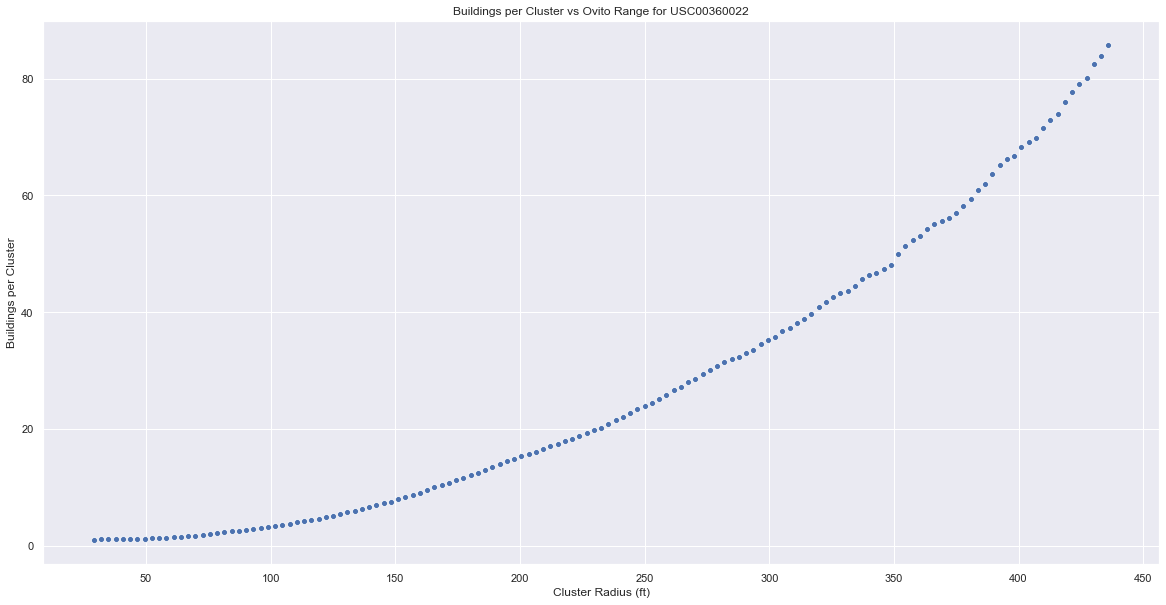

In [10]:
final_frame = buildingsPerCluster(code)

sns.set(rc={'figure.figsize':(20, 10)})

zip_dist = sns.scatterplot(x = final_frame['Ovito Range'] * findScale(code), y = final_frame['Buildings per Cluster'])

zip_dist.set_title('Buildings per Cluster vs Ovito Range for ' + str(code))

zip_dist.set(ylabel = 'Buildings per Cluster', xlabel = 'Cluster Radius (ft)')

In [12]:
# This saves the figure that's generated

fig = zip_dist.get_figure()

fig.savefig('Pictures and Figures/' + zip_code + '_per_cluster.png')